<a href="https://colab.research.google.com/github/Ayoubkassi/Twitter_Comercial_Segments/blob/main/Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 44.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.9/226.9 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 KB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.8/316.8 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from nltk.corpus import stopwords
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [8]:
import pandas as pd
df = pd.read_csv('apple.csv')
df2 = pd.read_csv('apple_users.csv')
df2.head()

,type,dateCreated,username,givenName,description,location,id,follows,friends,tweets
0,ProfilePage,2020-11-18T10:41:47.000Z,izcOjNJW8gzvSQ3,売れ筋速報,宜しくお願いします。Amazonアソシエイト・プログラムの参加者です。,NaN,1329011908347789314,1394,1589,19563
1,ProfilePage,2011-06-23T17:23:47.000Z,Olyduck,David Hedlind,Life passes too fast for only 140 characters a...,"Olympia,WA",322738109,57,247,3333
2,ProfilePage,2009-10-18T19:30:14.000Z,mchk_tw,みちこ🎏⚾️,野球 / サッカー / 音楽 / その他Web欄参照,藤原カンパニー,83426665,357,728,135328
3,ProfilePage,2021-08-27T05:07:50.000Z,ItsAppleMilk,🍎AppleMilk🥛,"She/they ,PNGtuber🕸 Very Human! Defiantly not ...",A very human location,1431121211946377220,1254,640,3477
4,ProfilePage,2009-08-05T08:42:48.000Z,rayj0e,Raymond Joe,NaN,NaN,63076920,36,490,3189


In [10]:
tweet = df2['tweets']
tweet = tweet.dropna().reset_index()
tweet.head()

,index,tweets
0,0,19563
1,1,3333
2,2,135328
3,3,3477
4,4,3189


In [11]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
comments = []
stop_words = set(stopwords.words('english'))

for words in tweet['tweets']:
    only_letters = re.sub("[^a-zA-Z]", " ",str(words))
    tokens = nltk.word_tokenize(only_letters) #tokenize the sentences
    lower_case = [l.lower() for l in tokens] #convert all letters to lower case
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case)) #Remove stopwords from the comments
    comments.append(' '.join(filtered_result))
  


In [13]:
#Using wordcloud to visualize the comments
unique_string=(" ").join(comments)
wordcloud = WordCloud(width = 2000, height = 1000,background_color='white').generate(unique_string)
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('plot23.png', dpi=400, bbox_inches='tight')
plt.show()


ValueError: ignored

In [14]:
import numpy as np

#extraction of the country 
def extract_country(location):
    if isinstance(location, str):
        split_loc = location.split(',')
        if len(split_loc) > 1:
            return split_loc[1].strip()
        else:
            return location.strip()
    else:
        return np.nan
df2['country'] = df2['location'].apply(extract_country)

df2 = df2[df2['country'].notna()]
df2.head()

,type,dateCreated,username,givenName,description,location,id,follows,friends,tweets,country
1,ProfilePage,2011-06-23T17:23:47.000Z,Olyduck,David Hedlind,Life passes too fast for only 140 characters a...,"Olympia,WA",322738109,57,247,3333,WA
2,ProfilePage,2009-10-18T19:30:14.000Z,mchk_tw,みちこ🎏⚾️,野球 / サッカー / 音楽 / その他Web欄参照,藤原カンパニー,83426665,357,728,135328,藤原カンパニー
3,ProfilePage,2021-08-27T05:07:50.000Z,ItsAppleMilk,🍎AppleMilk🥛,"She/they ,PNGtuber🕸 Very Human! Defiantly not ...",A very human location,1431121211946377220,1254,640,3477,A very human location
5,ProfilePage,2015-04-17T00:50:22.000Z,STARL00T3R,STARLOOTER SAWADA H.,Just some guys on the internet don't worry abo...,United States,3174491463,7,133,364,United States


In [15]:

def my_convert(row):
    try:
      cn_code = pc.country_name_to_country_alpha2(row.country, cn_name_format='default')
      conti_code = pc.country_alpha2_to_continent_code(cn_code)
      return conti_code
    except:
      return np.nan
df2['continent'] = df2.apply(my_convert, axis = 1)
df2.head()



,type,dateCreated,username,givenName,description,location,id,follows,friends,tweets,country,continent
1,ProfilePage,2011-06-23T17:23:47.000Z,Olyduck,David Hedlind,Life passes too fast for only 140 characters a...,"Olympia,WA",322738109,57,247,3333,WA,NaN
2,ProfilePage,2009-10-18T19:30:14.000Z,mchk_tw,みちこ🎏⚾️,野球 / サッカー / 音楽 / その他Web欄参照,藤原カンパニー,83426665,357,728,135328,藤原カンパニー,NaN
3,ProfilePage,2021-08-27T05:07:50.000Z,ItsAppleMilk,🍎AppleMilk🥛,"She/they ,PNGtuber🕸 Very Human! Defiantly not ...",A very human location,1431121211946377220,1254,640,3477,A very human location,NaN
5,ProfilePage,2015-04-17T00:50:22.000Z,STARL00T3R,STARLOOTER SAWADA H.,Just some guys on the internet don't worry abo...,United States,3174491463,7,133,364,United States,NA


In [16]:
df2.groupby('continent').size()

continent
NA    1
dtype: int64

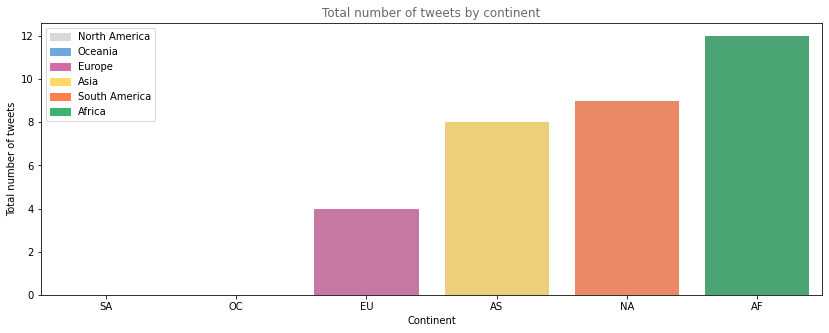

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palette for each continent
colors = ['#d8d8d8', '#6fa8dc', '#d36ba5', '#ffd966', '#ff7f50', '#3cb371']

plt.figure(figsize=(14,5))
sns.barplot(x=['SA','OC','EU','AS','NA','AF'], y=[0,0,4,8,9,12], palette=colors)
plt.ylabel('Total number of tweets')
plt.xlabel('Continent')
plt.title('Total number of tweets by continent', color='dimgrey')

# Create legend
legend_labels = ['North America', 'Oceania', 'Europe', 'Asia', 'South America', 'Africa']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i]) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels)

plt.show()

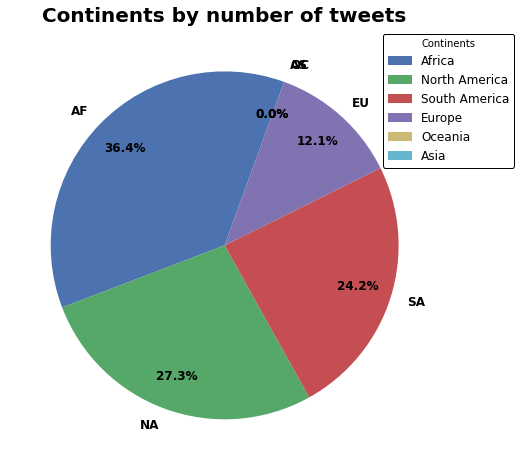

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

s = [12, 9, 8, 4, 0, 0]
new = ['AF', 'NA', 'SA', 'EU', 'OC', 'AS']
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']

fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(s, labels=new, colors=colors, startangle=70,
                                  autopct='%1.1f%%', pctdistance=0.8,
                                  labeldistance=1.1, textprops={'fontsize': 12,
                                                                 'color': 'black',
                                                                 'weight': 'bold'})
# Add legend
legend_labels = ['Africa', 'North America', 'South America',
                 'Europe', 'Oceania', 'Asia']
legend_colors = [colors[i] for i in range(len(new))]
plt.legend(wedges, legend_labels, title="Continents", loc="upper left",
           bbox_to_anchor=(0.85, 1), fontsize=12,
           frameon=True, framealpha=1, fancybox=True, edgecolor="black",
           facecolor="white")

# Add title and subtitle
ax.set_title("Continents by number of tweets", fontsize=20, weight="bold")

# Set aspect ratio to be equal and display the chart
ax.set_aspect('equal')
plt.show()